# Imports 

In [4]:
import os

import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt  

# Import Audio Files

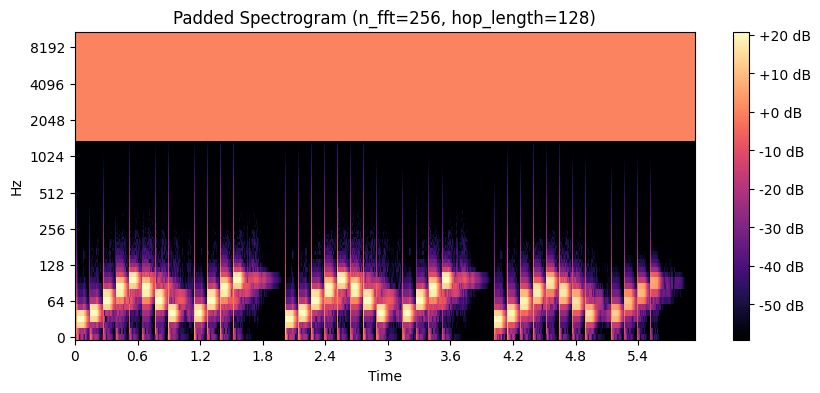

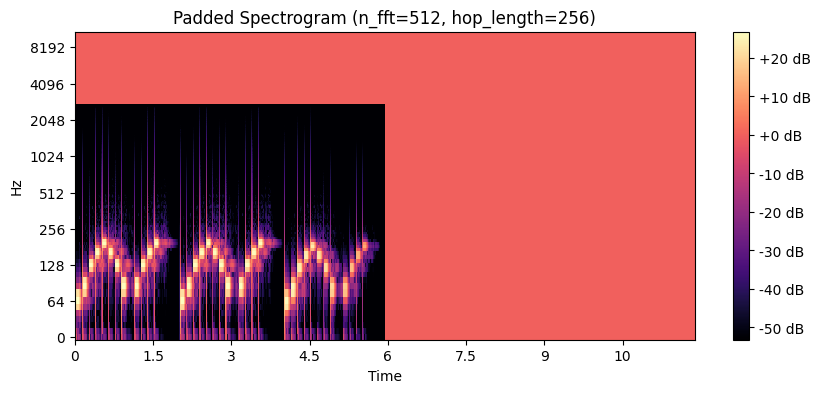

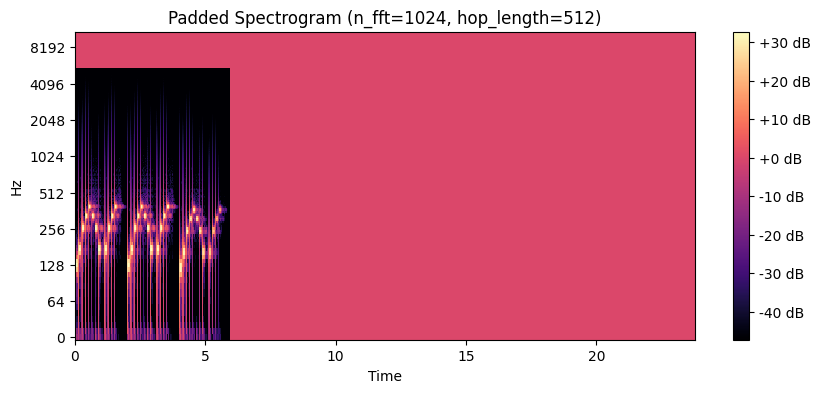

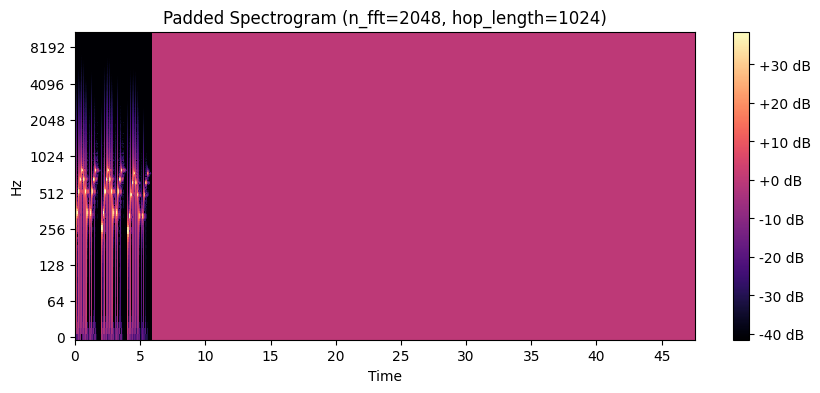

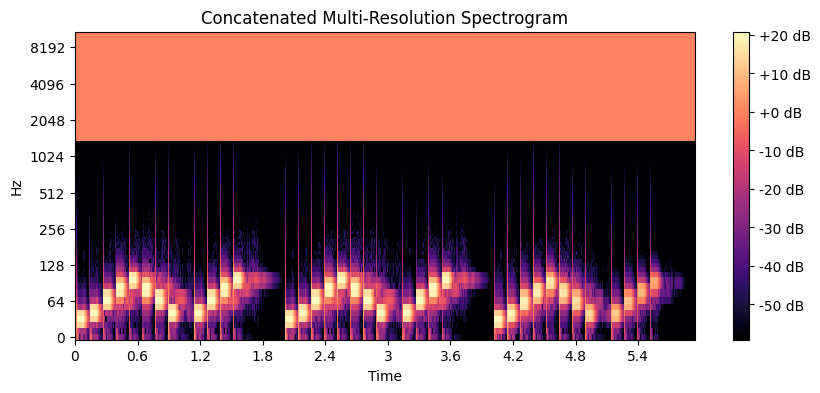

In [13]:
# Load the audio file
test_file = "testAudio.wav"
test, sr = librosa.load(test_file)

# Display the audio (now you provide rate=sr)
ipd.Audio(test, rate=sr)

# Define different n_fft and hop_length values (resolutions)
fft_sizes = [256, 512, 1024, 2048]  # Different frequency resolutions
hop_sizes = [128, 256, 512, 1024]  # Different hop lengths (time resolutions)

# Initialize an empty list to hold the spectrograms
spectrograms = []

# Compute spectrograms for each resolution
for fft, hop in zip(fft_sizes, hop_sizes):
    # Compute short-time Fourier transform (STFT)
    S = librosa.stft(test, n_fft=fft, hop_length=hop)  # Short-time Fourier transform
    S_db = librosa.amplitude_to_db(np.abs(S))  # Convert to dB scale for better visualization
    spectrograms.append(S_db)  # Append each spectrogram to the list

# Find the maximum shape for resizing all spectrograms to the same size
max_freq_bins = max(spec.shape[0] for spec in spectrograms)
max_time_steps = max(spec.shape[1] for spec in spectrograms)

# Pad spectrograms to the maximum size (max_freq_bins, max_time_steps)
def pad_spectrogram(spec, target_freq_bins, target_time_steps):
    orig_freq_bins, orig_time_steps = spec.shape
    # Pad frequency bins (vertically) if needed
    padded_spec = np.pad(spec, ((0, target_freq_bins - orig_freq_bins), (0, target_time_steps - orig_time_steps)),
                         mode='constant', constant_values=0)
    return padded_spec

# Pad all spectrograms
padded_spectrograms = [pad_spectrogram(spec, max_freq_bins, max_time_steps) for spec in spectrograms]

# Concatenate spectrograms along a new axis (axis=-1)
multi_res_spectrogram = np.stack(padded_spectrograms, axis=-1)  # Shape: (freq_bins, time_steps, 4)

# Plot the concatenated spectrogram
def plot_spectrogram(Y, sr, hop_length, title, y_axis="linear"):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(Y, sr=sr, hop_length=hop_length, x_axis="time", y_axis=y_axis)
    plt.colorbar(format="%+2.f dB")
    plt.title(title)
    plt.show()

# Plot each padded spectrogram
for i, (spec, fft, hop) in enumerate(zip(padded_spectrograms, fft_sizes, hop_sizes)):
    plot_spectrogram(spec, sr, hop, title=f"Padded Spectrogram (n_fft={fft}, hop_length={hop})", y_axis="log")

plot_spectrogram(multi_res_spectrogram[:,:,0], sr, hop_sizes[0], title="Concatenated Multi-Resolution Spectrogram", y_axis="log")
